
# superwiser: Dr Aghile Heydari
## Mr MOHAMMADI
## first Question

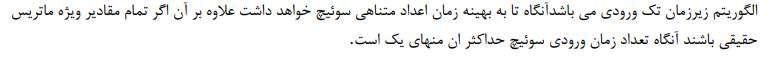

## $$\dot x = \begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix}=\begin{bmatrix}0,1\\ 0,0 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \end{bmatrix} u$$
## $$\begin{bmatrix} x_1(0) \\ x_2(0) \end{bmatrix}=\begin{bmatrix} 3 \\ -1 \end{bmatrix} , \begin{bmatrix} x_1(t_1) \\ x_2(t_1) \end{bmatrix}=\begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

In [1]:
# !pip install matplotlib
# !pip install sympy
# !pip install numpy

import numpy as np


In [2]:
#defining matices A , B 
Rows = int(input("Give the number of rows of A:"))  
Columns = int(input("Give the number of columnsof A:"))  
A = np.array([[int(input()) for c in range (Columns)] for r in range(Rows)]).reshape(Rows,Columns)
print('this is matrix A',A)
Row = int(input("Give the number of rows of B:"))  
Column = int(input("Give the number of columns of B:"))  
B=np.array([[int(input()) for c in range (Column)] for r in range(Row)]).reshape(Row,Column)
print('this is matrix B',B)
A.shape , B.shape

Give the number of rows of A:2
Give the number of columnsof A:2
0
1
0
0
this is matrix A [[0 1]
 [0 0]]
Give the number of rows of B:2
Give the number of columns of B:1
0
1
this is matrix B [[0]
 [1]]


((2, 2), (2, 1))

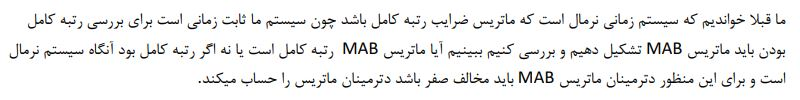
## $$MAB=\begin{bmatrix} B, AB,A^2B,....,A^{n-1}B \end{bmatrix}$$

In [3]:
# defining new matrix whose columns are B  and AB which is called MAB

a={}
for i in range(Rows-1):
    if i==0:
        a[0]=np.matmul(A,B)
    else:
        a[i]=np.matmul(A,a[i-1])
        
#making MAB matrix

AA=list(a.values())      
MAB=B
for i in range(Rows-1):        
    MAB=np.concatenate((MAB,AA[i]), axis=1)




MAB

array([[0, 1],
       [1, 0]])

In [4]:
# calculating determinant of matrix MAB

dt=np.linalg.det(MAB)
dt

-1.0

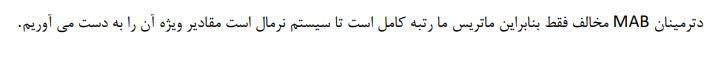

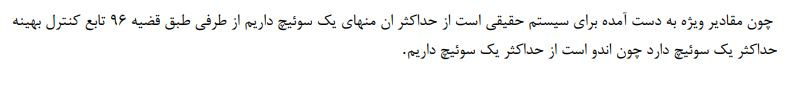

In [5]:
if dt!=0:
    print('system is normal')
    eigens=np.linalg.eigvals(A)
    print('eigen values are=',eigens)
    #calculating rank of matrix
    n=np.linalg.matrix_rank(MAB)
    print('switch numbers are equal to =',n-1)
else:
    print('system is not normal,and we dont calculate eigen values **finished**')
    

system is normal
eigen values are= [0. 0.]
switch numbers are equal to = 1


In [6]:
from sympy import *
s= Symbol('s')
t= Symbol('t')
I=np.identity(Rows)

X1=Function('x1')(t)
X2=Function('x2')(t)
X3=Function('x3')(t)
x_variable=[X1,X2,X3]
def X():
    X=[]
    for i in range(Rows):
        X.append(x_variable[i])
    return Matrix(Rows,1,X)
# def phi(t,s):
inves=Matrix(s*I-A).inv()
display(inves)

phi_t=inverse_laplace_transform(inves, s, t, noconds=True).subs(Heaviside(t),1)
display(phi_t)
X().diff()

Matrix([
[1.0/s, 1.0/s**2],
[    0,    1.0/s]])

Matrix([
[1.0, 1.0*t],
[  0,   1.0]])

Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]])

In [7]:
x_0=Eq(X().subs(t,0),Matrix(2,1,[3,-1]))
x_0

Eq(Matrix([
[x1(0)],
[x2(0)]]), Matrix([
[ 3],
[-1]]))

In [8]:
Eq(X(),Matrix(2,1,[0,0]))

Eq(Matrix([
[x1(t)],
[x2(t)]]), Matrix([
[0],
[0]]))

In [9]:
z1 , z2 , z3 , z4 , z5 =symbols("z1 , z2 , z3 , z4 , z5")
z_variable=[z1 , z2 , z3 , z4 , z5]

def Z():
    b=[]
    for i in range(Rows):
        b.append(z_variable[i])
    return Matrix(Rows,1,b)
def U():
    return sign(Matrix(B.T)*phi_t.T*Z())


U().subs(z1,0)

sign(Matrix([[1.0*z2]]))

In [10]:
equ=Eq(X().diff(),Matrix(A)*X()+Matrix(B)*-1)
equ

Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[x2(t)],
[   -1]]))

In [11]:
equ1=Eq(X().diff(),phi_t*x_0.rhs+integrate(phi_t.subs(t,t-s)*Matrix(B),(s,0,t)))
equ1

Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[0.5*t**2 - 1.0*t + 3.0],
[           1.0*t - 1.0]]))

In [92]:
sol1=Eq(Matrix(2,1,[0,0]),phi_t*x_0.rhs+integrate(phi_t.subs(t,t-s)*Matrix(B),(s,0,t)))
solve(sol1,t)

[]

In [14]:
equ2=Eq(X().diff(),phi_t*x_0.rhs+integrate(phi_t.subs(t,t-s)*Matrix(B),(s,0,t))*-1)
equ2

Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[-0.5*t**2 - 1.0*t + 3.0],
[           -1.0*t - 1.0]]))

In [15]:
sol2=Eq(Matrix(2,1,[0,0]),phi_t*x_0.rhs+integrate(phi_t.subs(t,t-s)*Matrix(B),(s,0,t))*-1)
solve(sol2,t)

[]

In [47]:
list(solve(Eq(X(),equ1.rhs),X()[0]).values())[0].subs(t,X()[1]+1).expand()

0.5*x2(t)**2 + 2.5

In [49]:
list(solve(Eq(X(),equ2.rhs),X()[0]).values())[0].subs(t,-X()[1]+1).expand()

-0.5*x2(t)**2 + 2.0*x2(t) + 1.5

In [55]:
equ3=Eq(X().diff(),Matrix(A)*X()+Matrix(B)*1)
equ3

Eq(Matrix([
[Derivative(x1(t), t)],
[Derivative(x2(t), t)]]), Matrix([
[x2(t)],
[    1]]))

In [69]:
Eq(X()[0],integrate(equ3.rhs[0],X()[1]))

Eq(x1(t), x2(t)**2/2)

In [73]:
Eq(X()[1],X()[1])

True

In [51]:
Eq(list(solve(Eq(X(),equ1.rhs),X()[0]).values())[0].subs(t,X()[1]+1).expand().subs(X()[1],t),0)

Eq(0.5*t**2 + 2.5, 0)

In [75]:
Eq(t,0)

Eq(t, 0)

In [83]:
Eq(list(solve(Eq(X(),equ1.rhs),X()[0]).values())[0].subs(t,X()[1]+1).expand().subs(X()[1],t)+t,0).subs(t**2,-t**2)

Eq(-0.5*t**2 + t + 2.5, 0)

In [82]:
solve(Eq(list(solve(Eq(X(),equ1.rhs),X()[0]).values())[0].subs(t,X()[1]+1).expand().subs(X()[1],t)+t,0).subs(t**2,-t**2),t)

[-1.44948974278318, 3.44948974278318]

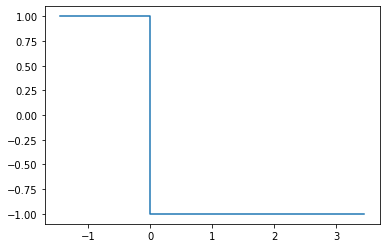

In [87]:
import matplotlib.pyplot as plt
x=[-1.44948974278318, 0,3.44948974278318]
y=[1,1,-1]
plt.step(x, y)
plt.show()

# second Question 

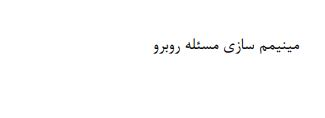
##   $$ min  F[u]=\frac{1}{2} \int_{t_0}^{t_1} x^2(t) +u^4(t) dt$$ 
$$s.t$$
## $$ \dot x =x+u $$
## $$ x(0)=1$$

In [78]:
# importing used packages
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
#creating variables

t=Symbol(' t  ', real=True) 
x=Function('x')(t)
u=Function('u')(t)
p=Function('p')(t)
m=Rational(input("please enter integral coefficiont="))
t0=Rational(input("please enter t0="))
t1=Rational(input("please enter t1="))
F=eval(input('please enter integral  ='))

Fu=Eq(Function('f')(u),m*Integral(F,(t,t0,t1)))
Fu

please enter integral coefficiont=0.5
please enter t0=0
please enter t1=2
please enter integral  =x**2+u**2


Eq(f(u( t  )), Integral(u( t  )**2 + x( t  )**2, ( t  , 0, 2))/2)

In [79]:
#giving initial conditions by building dictionary
xt=Rational(input("in x(t)   t="))
xx=Rational(input("please enter value of x(t)="))
pt=Rational(input("in p(t)    t="))
pp=Rational(input("please enter value for p(t)="))
ics={x.subs(t,xt):xx,p.subs(t,pt):pp}
ics

in x(t)   t=0
please enter value of x(t)=1
in p(t)    t=2
please enter value for p(t)=1


{x(0): 1, p(2): 1}

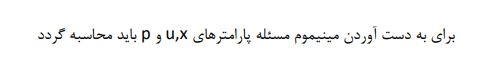

In [80]:
# getting initial conditions from user(x dot)
f=Eq(Function('f')(x,u,t),eval(input('please enter x dot  =')))
f

please enter x dot  =u+x


Eq(f(x( t  ), u( t  ),  t  ), u( t  ) + x( t  ))

In [81]:
g=Eq(Function('g')(x,u,t),m*F)
g

Eq(g(x( t  ), u( t  ),  t  ), u( t  )**2/2 + x( t  )**2/2)

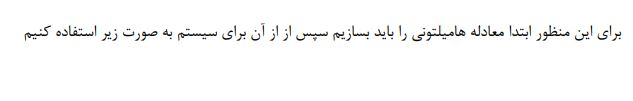

In [82]:
# this is hamiltobian equ
H=Eq(Function('H')(x,u,p,t),g.rhs+p*f.rhs)
H

Eq(H(x( t  ), u( t  ), p( t  ),  t  ), (u( t  ) + x( t  ))*p( t  ) + u( t  )**2/2 + x( t  )**2/2)

In [83]:
# this is same_condition
equ0=Eq(p.diff(t),-f.rhs.diff(x)*p-g.rhs.diff(x))
equ0

Eq(Derivative(p( t  ),  t  ), -p( t  ) - x( t  ))

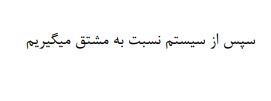

In [84]:
# diff of equ0 same condition
equ1=Eq(p.diff().diff(),equ0.rhs.diff())
equ1

Eq(Derivative(p( t  ), ( t  , 2)), -Derivative(p( t  ),  t  ) - Derivative(x( t  ),  t  ))

In [85]:
# diff of H equaled to zero
a=Eq(H.rhs.diff(u),0)
a

Eq(p( t  ) + u( t  ), 0)

In [86]:
# solving a for u(t)
u_t=solve(a,u)[0]
Eq(u,u_t)

Eq(u( t  ), -p( t  ))

In [87]:
equ2=Eq(p.diff().diff(),equ1.rhs.subs({p.diff():equ0.rhs,x.diff():f.rhs})).subs(u,u_t)
equ2.simplify()

Eq(2*p( t  ), Derivative(p( t  ), ( t  , 2)))

In [11]:
# equ2=Eq(p.diff().diff(),2*p)
# equ2

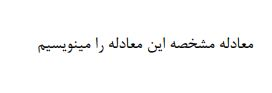

In [88]:
solution=dsolve(equ2)
solution

Eq(p( t  ), C1*exp(-sqrt(2)* t  ) + C2*exp(sqrt(2)* t  ))

In [89]:
equ3=solution.subs({t:pt,p:pp})
equ3

Eq(1, C1*exp(-2*sqrt(2)) + C2*exp(2*sqrt(2)))

In [90]:
x_t=Eq(x,-solution.rhs.diff(t)-solution.rhs)
x_t

Eq(x( t  ), -C1*exp(-sqrt(2)* t  ) + sqrt(2)*C1*exp(-sqrt(2)* t  ) - sqrt(2)*C2*exp(sqrt(2)* t  ) - C2*exp(sqrt(2)* t  ))

In [91]:
equ4=x_t.subs({t:xt,x:xx})
equ4

Eq(1, -C1 + sqrt(2)*C1 - sqrt(2)*C2 - C2)

In [92]:
freevar=x_t.subs({t:xt,x:xx}).free_symbols
freevar

{C1, C2}

In [93]:
par_sol=solve([equ3,equ4],freevar)
par_sol

{C1: exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + sqrt(2)*exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + exp(4*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))),
 C2: -exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) - 1/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + sqrt(2)*exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2)))}

In [94]:
p_t=solution.subs(par_sol)
p_t

Eq(p( t  ), (-exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) - 1/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + sqrt(2)*exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))))*exp(sqrt(2)* t  ) + (exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + sqrt(2)*exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + exp(4*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))))*exp(-sqrt(2)* t  ))

In [95]:
xt=x_t.subs(par_sol).simplify()
xt

Eq(x( t  ), (exp(2*sqrt(2)* t  ) + sqrt(2)*exp(2*sqrt(2)* t  ) - exp(2*sqrt(2)*( t   + 1)) - exp(4*sqrt(2)) + exp(2*sqrt(2)) + sqrt(2)*exp(4*sqrt(2)))*exp(-sqrt(2)* t  )/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))))

In [96]:
ut=u_t.subs(p,p_t.rhs)
ut

-(-exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) - 1/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + sqrt(2)*exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))))*exp(sqrt(2)* t  ) - (exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + sqrt(2)*exp(2*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))) + exp(4*sqrt(2))/(-exp(4*sqrt(2)) + 1 + sqrt(2) + sqrt(2)*exp(4*sqrt(2))))*exp(-sqrt(2)* t  )

In [97]:
#defining our min of function by given input
def minf(n):
    return N(Fu.subs({u:ut.subs(t,n),x:xt.rhs.subs(t,n)}).rhs)
minf(0.05)

7.45393324323088

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ] [8.58075461536100, 4.59931055290708, 2.49549070382887, 1.41043088755634, 0.901165889943071, 0.759793183089752, 0.928598721718336, 1.47649574033103, 2.62715791713453, 4.85033199780494]


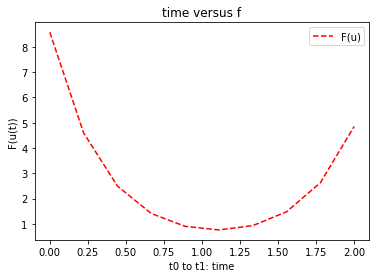

minimum occors at t= 1.1111111111111112 and value of 0.759793183089752


In [99]:

zz=np.linspace(float(t0),float(t1),10)
yy=[minf(n) for n in zz]
print(zz,yy)
plt.xlabel("t0 to t1: time")
plt.ylabel("F(u(t))")
plt.plot( zz, yy, 'r--' ,label='F(u)')
plt.title('time versus f')
plt.legend()
plt.show()
print(f'minimum occors at t= {zz[np.argmin(yy)]} and value of {min(yy)}')

## complete model for Hammiltonian

please enter integral coefficiont=2
please enter t0=0
please enter t1=2
please enter integral  =x**2+u**2


Eq(f(u( t  )), 2*Integral(u( t  )**2 + x( t  )**2, ( t  , 0, 2)))

in x(t)   t=0
please enter value of x(t)=1
in p(t)    t=2
please enter value for p(t)=0
please enter x dot  =-u+x
this is Hamilotian equation


Eq(H(x( t  ), u( t  ), p( t  ),  t  ), (-u( t  ) + x( t  ))*p( t  ) + 2*u( t  )**2 + 2*x( t  )**2)

this is same_condition equation


Eq(Derivative(p( t  ),  t  ), -p( t  ) - 4*x( t  ))

this solution to x(t)


Eq(x( t  ), ((2 + sqrt(5))*exp(sqrt(5)* t  ) + (-2 + sqrt(5))*exp(2*sqrt(5)))*exp(-sqrt(5)* t  /2)/(-2*exp(2*sqrt(5)) + 2 + sqrt(5) + sqrt(5)*exp(2*sqrt(5))))

this is solution to u(t)


-exp(sqrt(5)* t  /2)/(2*(-2*exp(2*sqrt(5)) + 2 + sqrt(5) + sqrt(5)*exp(2*sqrt(5)))) + exp(2*sqrt(5))*exp(-sqrt(5)* t  /2)/(2*(-2*exp(2*sqrt(5)) + 2 + sqrt(5) + sqrt(5)*exp(2*sqrt(5))))

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ] [16.0778751300972, 10.2351396325018, 6.75854775365396, 4.77187281252831, 3.77440099208743, 3.51473337836647, 3.92742435701971, 5.11648695549354, 7.38160788148906, 11.2936793939401]


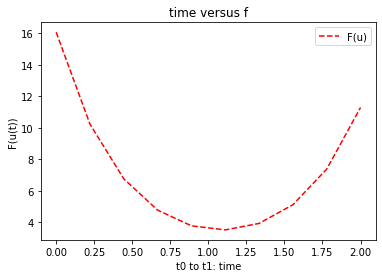

minimum occors at t= 1.1111111111111112 and value of 3.51473337836647


In [40]:
# importing used packages
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
#creating variables
t=Symbol(' t  ', real=True) 
x=Function('x')(t)
u=Function('u')(t)
p=Function('p')(t)
m=Rational(input("please enter integral coefficiont="))
t0=Rational(input("please enter t0="))
t1=Rational(input("please enter t1="))
F=eval(input('please enter integral  ='))
Fu=Eq(Function('f')(u),m*Integral(F,(t,t0,t1)))
display(Fu)
xt=Rational(input("in x(t)   t="))
xx=Rational(input("please enter value of x(t)="))
pt=Rational(input("in p(t)    t="))
pp=Rational(input("please enter value for p(t)="))
ics={x.subs(t,xt):xx,p.subs(t,pt):pp}
f=Eq(Function('f')(x,u,t),eval(input('please enter x dot  =')))
g=Eq(Function('g')(x,u,t),m*F)
H=Eq(Function('H')(x,u,p,t),g.rhs+p*f.rhs)
print('this is Hamilotian equation')
display(H)
equ0=Eq(p.diff(t),-f.rhs.diff(x)*p-g.rhs.diff(x))
print('this is same_condition equation')
display(equ0)
equ1=Eq(p.diff().diff(),equ0.rhs.diff())
a=Eq(H.rhs.diff(u),0)
u_t=solve(a,u)[0]
equ2=Eq(p.diff().diff(),p+x-f.rhs).subs(u,u_t)
solution=dsolve(equ2)
equ3=solution.subs({t:pt,p:pp})
x_t=Eq(x,-solution.rhs.diff(t)-solution.rhs)
equ4=x_t.subs({t:xt,x:xx})
freevar=x_t.subs({t:0,x:1}).free_symbols
par_sol=solve([equ3,equ4],freevar)
p_t=solution.subs(par_sol)
xt=x_t.subs(par_sol).simplify()
print('this solution to x(t)')
display(xt)
ut=u_t.subs(p,p_t.rhs)
print('this is solution to u(t)')
display(ut)
def minf(n):
    return N(Fu.subs({u:ut.subs(t,n),x:xt.rhs.subs(t,n)}).rhs)
zz=np.linspace(float(t0),float(t1),10)
yy=[minf(n) for n in zz]
print(zz,yy)
plt.xlabel("t0 to t1: time")
plt.ylabel("F(u(t))")
plt.plot( zz, yy, 'r--' ,label='F(u)')
plt.title('time versus f')
plt.legend()
plt.show()
print(f'minimum occors at t= {zz[np.argmin(yy)]} and value of {min(yy)}')